In [1]:
!pip install -U keras

In [2]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import json
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D
from keras.utils import to_categorical

x_train shape: (192, 842, 595, 1)
y_train shape: (192,)
x_test shape: (48, 842, 595, 1)
y_test shape: (48,)


(-0.5, 594.5, 841.5, -0.5)

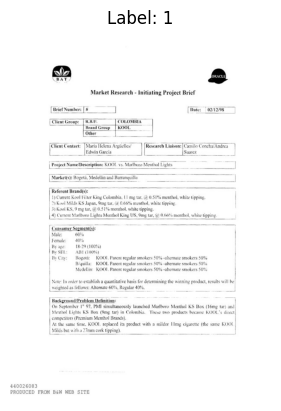

In [3]:

# Chemins
chemin_images = "dataset/wpayslip/jpeg"
chemin_annotations = "dataset/wpayslip/json"

# Charger les images et annotations
images = [os.path.join(chemin_images, f) for f in os.listdir(chemin_images) if f.endswith(".jpeg")]
annotations = [os.path.join(chemin_annotations, f) for f in os.listdir(chemin_annotations) if f.endswith(".json")]

# Transformer en DataFrame
data = pd.DataFrame({"file_paths": images})

# Charger les annotations dans un dictionnaire
dictinnaire_annotations = {}
for json_file in annotations:
    with open(json_file, "r") as f:
        file_name = os.path.basename(json_file).replace(".json", "")
        dictinnaire_annotations[file_name] = json.load(f)

# Associer les annotations
def charger_annotations(data):
    annotated_data = []
    for file_path in data["file_paths"]:
        file_name = os.path.basename(file_path).replace(".jpeg", "")
        annotation = dictinnaire_annotations.get(file_name, {}).get("label", "autre")  # Extraire "label"
        annotated_data.append({"file_path": file_path, "annotation": annotation})  # Stocke seulement le label
    return pd.DataFrame(annotated_data)


data = charger_annotations(data)


# Attribuez une étiquette numérique à chaque classe
classes_mapping = {"fiche salaire": 0, "autre": 1}
num_classes = len(classes_mapping)  # Cela vaudra 2



# Diviser en train et test
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

def charger_numpy(data, img_size=(595, 842)):
    images = []
    labels = []
    for _, row in data.iterrows():
        img = Image.open(row["file_path"]).convert("L").resize(img_size)
        images.append(np.expand_dims(np.array(img), axis=-1))  # Ajouter un canal pour niveaux de gris

        # Convertir l'annotation en étiquette numérique
        label = classes_mapping.get(row["annotation"], None)  # Assurez-vous que l'annotation existe
        if label is not None:
            labels.append(label)
        else:
            raise ValueError(f"Annotation inconnue : {row['annotation']}")

    return np.array(images), np.array(labels)

x_train, y_train = charger_numpy(train_data)
x_test, y_test = charger_numpy(test_data)



# Normalise les données pour être entre 0.0 et 1.0
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


# nombre de classe de notre modèle
num_classes = 2

# on mets les données en forme avec l'encodage "one-hot"
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [4]:
x_train[0]

array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]]], dtype=uint8)

In [5]:
# Normalise les données pour être entre 0.0 et 1.0
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [6]:
x_train[0]

array([[[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]], dtype=float32)

In [7]:
# nombre de classe de notre modèle
num_classes = 2

# on mets les données en forme avec l'encodage "one-hot"
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [9]:
print(f"Number of rows in data: {len(y_train)}")

Number of rows in data: 192


In [10]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [11]:
print(f"Number of rows in data: {len(y_test)}")

Number of rows in data: 48


In [12]:

import keras
from keras import layers

# Construire un moins simple



model = keras.Sequential([
    layers.Conv2D(16, (3, 3), activation="relu", input_shape=(595, 842, 1)),  # Convolution
    layers.MaxPooling2D(pool_size=(2, 2)),  # Réduction de la taille
    layers.Flatten(),
    layers.Dense(600, activation="relu"),
    layers.Dense(300, activation="relu"),
    layers.Dense(75, activation="relu"),
    layers.Dense(num_classes, activation="softmax"),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# "résumé" de notre modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 593, 840, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 296, 420, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1989120)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 600)                 │   1,193,472,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 300)                 │         180,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 75)                  │          22,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             152 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,193,675,787 (4.45 GB)

 Trainable params: 1,193,675,787 (4.45 GB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [15]:

# Entraîner le modèle
hist = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=4,
    validation_split=0.1

)



Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.6425 - loss: 96.1655 - val_accuracy: 0.8500 - val_loss: 24.7592
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8181 - loss: 7.1146 - val_accuracy: 0.9500 - val_loss: 0.0414
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9340 - loss: 2.7405 - val_accuracy: 1.0000 - val_loss: 4.9052e-06
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9936 - loss: 0.0293 - val_accuracy: 0.9500 - val_loss: 0.6207
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9923 - loss: 0.0964 - val_accuracy: 1.0000 - val_loss: 3.7211e-04
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 9.2850e-04
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 9.4025e-04
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 1.0000 - loss: 0.0000

In [16]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 0.9618 - loss: 1.0395


[1.2416201829910278, 0.9583333134651184]

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.2416201829910278
Test accuracy: 0.9583333134651184


In [18]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.ylim(0.10, 1.0)
    plt.legend(["train", "validation"], loc="upper right")
    plt.show()

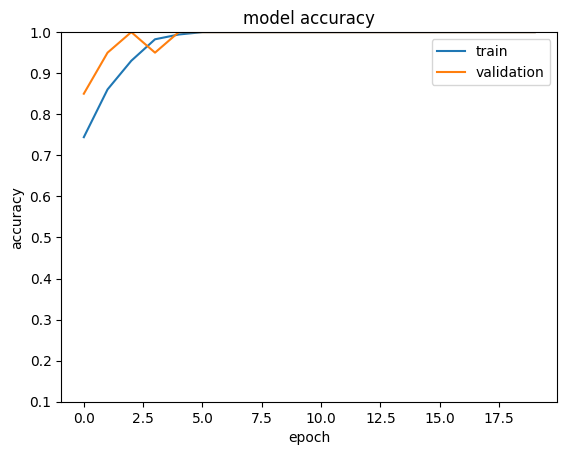

In [19]:
plot_hist(hist)

In [20]:
def plot_hist(hist):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Accuracy", color="tab:blue")
    ax1.plot(hist.history["accuracy"], label="Train Accuracy", color="tab:blue")
    ax1.plot(hist.history["val_accuracy"], label="Val Accuracy", linestyle="dashed", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    ax2 = ax1.twinx()
    ax2.set_ylabel("Loss", color="tab:red")
    ax2.plot(hist.history["loss"], label="Train Loss", color="tab:red")
    ax2.plot(hist.history["val_loss"], label="Val Loss", linestyle="dashed", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    fig.tight_layout()
    plt.title("Model Accuracy & Loss")
    plt.legend(["Train Acc", "Val Acc", "Train Loss", "Val Loss"], loc="center right")
    plt.show()

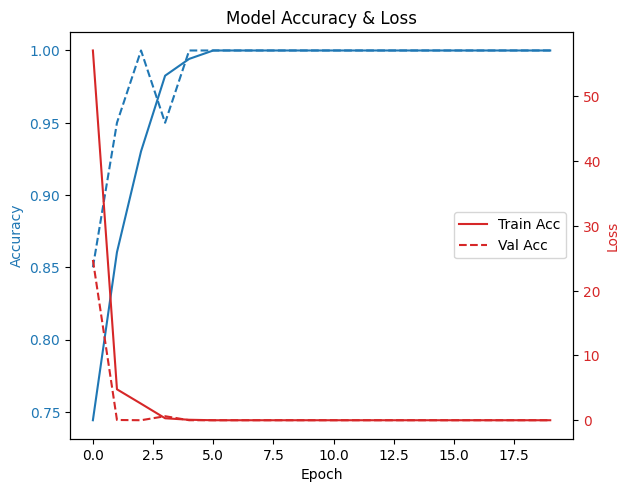

In [21]:
plot_hist(hist)

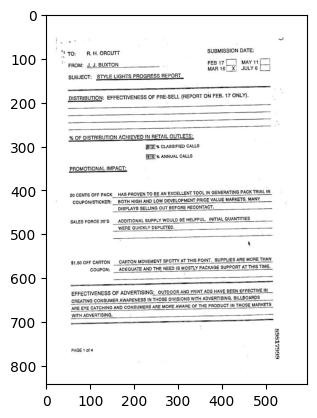

In [22]:

to_test = x_test[3]
plt.imshow(to_test, cmap="gray")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Text(0, 0.5, 'Probability')

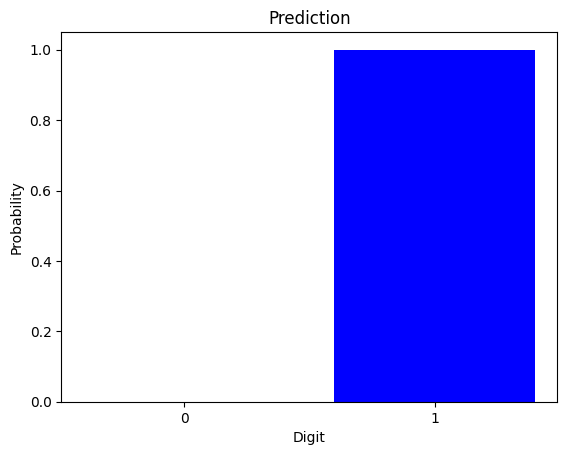

In [23]:
prediction = model.predict(np.array([to_test]))
plt.bar(range(2), prediction[0], color='blue')
plt.title('Prediction')
plt.xticks(range(2))
plt.xlabel('Digit')
plt.ylabel('Probability')

In [ ]:
model.save('pipeline07.h5')  # Sauvegarder le modèle

In [ ]:
model.save('pipeline07simple.keras')

In [24]:
keras.saving.save_model(model, 'pipeline07complex.keras')

In [27]:
from google.colab import drive
drive.mount('/content/drive')  # Monter Google Drive
model.save("/content/drive/MyDrive/pipeline07complex.keras")

Mounted at /content/drive


In [ ]:
model.save_weights("pipeline07_.weights.h5")

In [ ]:
# Construire un modèle simple
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Flatten(input_shape=(595, 842)),
        layers.Dense(600, activation="relu"),
        layers.Dense(300, activation="relu"),
        layers.Dense(75, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)